### Tanzinian Water Pump Classification ###

### Exploritory Data Analysis

This notebook will show how we determine which features to use. 
We will explore the relationships between the features and target data as well as a look at our feature engineering. 

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle 
import numpy as np

pd.set_option('precision', 4)
pd.options.display.max_seq_items = None

In [38]:
df = pd.read_pickle('clean_df.pkl')

In [110]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded
0,69572,6000.0,20110314,roman,1390,Roman,34.9381,-9.8563,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011
1,8776,0.0,20130306,grumeti,1399,GRUMETI,34.6988,-2.1475,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013
2,34310,25.0,20130225,lottery club,686,World vision,37.4607,-3.8213,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013
3,67743,0.0,20130128,unicef,263,UNICEF,38.4862,-11.1553,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013
4,19728,0.0,20110713,action in a,0,Artisan,31.1308,-1.8254,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011


In [39]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

We have a lot of columns to work through, so as we go through them, we will start a list of columns to drop. For example, 'id' is not a relevant predictor, so we will add it to the list. 

In [40]:
dropcols = ['id']

## Visualizations and Finding Relationships

Below we start with a look at the status_groups. This does show what we already know in that
the classes are imbalanced with functional needs repair as the smallest class. 

### Target
#### ['status_group']

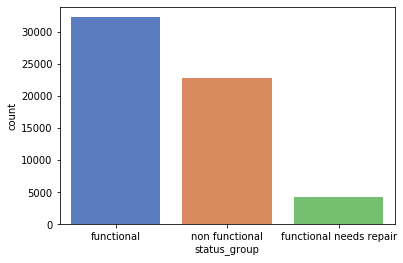

In [52]:
sns.countplot(df.status_group, palette = 'muted')
plt.show()

### Amount TSH 
#### ['amount_tsh'] vs ['status_group']

In [42]:
#df[df['status_group'] == 'non functional']['amount_tsh'].value_counts()

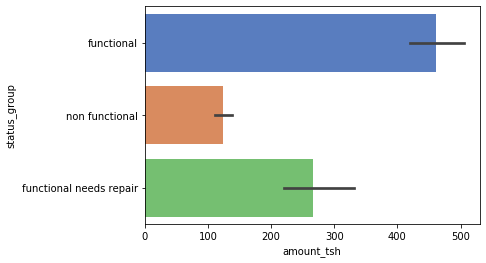

In [51]:
sns.barplot(x = 'amount_tsh', y = 'status_group', data = df, palette = 'muted')
plt.show()

### GPS Height 
#### ['gps_height'] vs ['status_group'] 

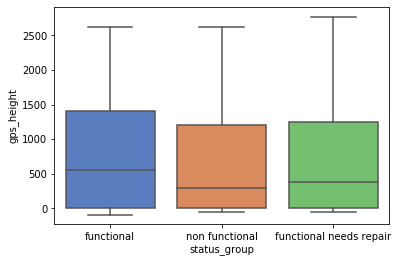

In [50]:
sns.boxplot(x = 'status_group', y = 'gps_height', data = df, palette = 'muted')
plt.show()

### Funder and Installer
#### ['funder']/['installer'] vs ['status_group']

Looking at the funders and the installers of the wells, I imagined turning these into dummy variables would be helpful. 
However, given the number of these groups, we decided that funder/installer with 3 or more listings we could keep and turn into dummies. 



In [109]:
#list(df['funder'].sort_values(ascending = False).unique())

In [ ]:
other_funders = df.funder.unique()[df.funder.value_counts() <= 3]
df['funder'] = np.where(df.funder.isin(other_funders), 'others', df.funder)

In [ ]:
other_installer = df.installer.unique()[df.installer.value_counts() <= 3]
df['installer'] = np.where(df.installer.isin(other_installer), 'others', df.installer)

### Latitude and Longitude
#### ['latitude']/['longitude'] vs ['status_group']

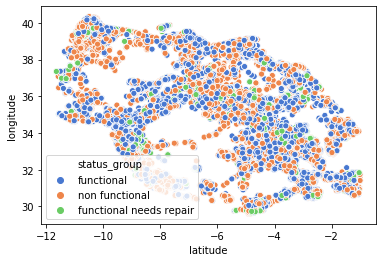

In [58]:
sns.scatterplot(x = 'latitude', y = 'longitude', data = df, hue = 'status_group', palette = 'muted');

### WPT Name / Num Private 
#### ['wpt_name']/['num_private'] vs ['status_group']

WPT is the "water point name", this should have no effect on the target itself and should be removed. 

In [76]:
dropcols += ['wpt_name']

Num_Private we don't know exactly what this is but the overwhelming majority show 0. 
For now we have opted to leave this as is and see what we may want to do with it later. 

In [74]:
df['num_private'].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

### Basin / Subvillage / Region / Region Code / District Code / Ward 
#### ['basin']/['subvilliage']/['region']/['region_code']/['district_code']/['ward']/['lga'] vs ['status_group']

In [46]:
# convert region_code and district_code to be objects.
df['region_code'] = df.region_code.astype('object')
df['district_code'] = df.district_code.astype('object')

### Population
#### ['population'] vs ['status_group']

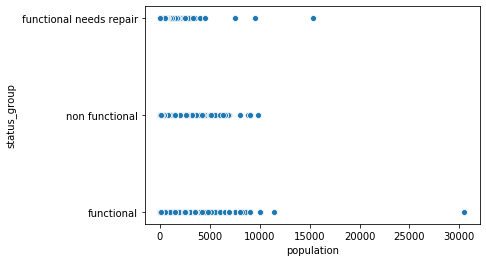

In [79]:
sns.scatterplot(x = 'population', y = 'status_group', data = df)

### Public Meeting / Recorded By 
#### ['public_meeting']/['recorded_by'] vs ['status_group']

### Scheme Management / Scheme Name
#### ['scheme_managment']/['scheme_name'] vs ['status_group']

### Permit 
#### ['permit'] vs ['status_group']

### Construction Year
#### ['construction_year'] vs ['status_group']

In [47]:
# separate dates
df['year_recorded'] = [int(x[0:4]) for x in df.date_recorded]
df['date_recorded'] = [int(x.replace('-', '')) for x in df.date_recorded]

### Extraction Type / Extraction Type Group / Extraction Type Class
#### ['extraction_type']/['extraction_type_group']/['extraction_type_class'] vs ['status_group']

### Payment / Payment Type
#### ['payment']/['payment_type'] vs ['status_group']

### Water Quality / Quality Group
#### ['water_quality']/['quality_group'] vs ['status_group']

### Quantity / Quantity Group
#### ['quantity']/['quantity_group'] vs ['status_group']

### Source / Source Type / Source Class
#### ['source']/['source_type']/['source_class'] vs ['status_group']

### Waterpoint Type / Waterpoint Type Group
#### ['waterpoint_type']/['waterpoint_type_group'] vs ['status_group']

In [48]:
df.to_pickle('eda_df.pkl')